c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.5925608377669577
MAE: 0.43836817155756164
MAPE: 0.1154276251705515
R2: 0.7906774144346957
      Actual  Predicted
3151    7.40    7.20296
3152    5.06    4.55650
3153    3.22    3.32282
3154    3.63    3.67070
3155    7.04    6.60730
...      ...        ...
3589    3.81    3.86496
3590    5.72    5.59530
3591    5.81    5.05996
3592    9.00    7.84812
3593    4.84    4.66596

[443 rows x 2 columns]
               Feature  Importance
4          slg_percent    0.640351
5      on_base_percent    0.168227
3           bb_percent    0.013138
16  linedrives_percent    0.011409
15    flyballs_percent    0.011343
1               p_game    0.009921
11     in_zone_percent    0.009767
17      popups_percent    0.009293
12        edge_percent    0.009292
2            k_percent    0.009109
19   fastball_avg_spin    0.009029
14    f_strike_percent    0.008521
22  breaking_avg_break    0.008407
13       swing_percent    0.008404
20  fastball_avg_break    0.008154
18  fastball_avg_speed    0.00

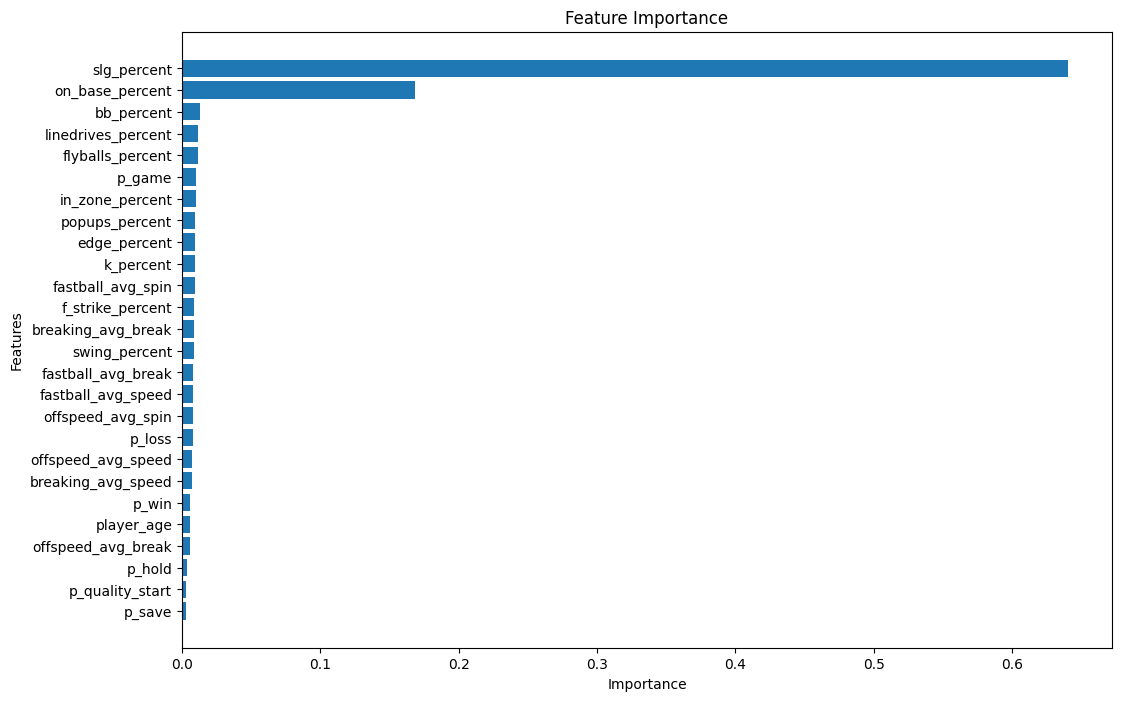

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp1.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(0)
    
# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = RandomForestRegressor(n_estimators=500, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 비교 결과 출력
print(comparison)

feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()